In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import mne
from mne import create_info
from mne.io import RawArray

In [52]:
df = pd.read_csv("data/subject_02_csv/subject_02_session_01_test.csv")

In [53]:
df.head()

,Time,FP1,FP2,AFz,F7,F3,F4,F8,FC5,FC1,...,P8,PO7,O1,Oz,O2,PO8,PO9,PO10,Trigger,Target
0,0.000000,21152,-8708.2,12126,1299.6,27705,-453.63,-7833.2,11513,47283,...,19624,10217.0,3160.9,1311.1,6277.6,5456.7,17911,4908.6,0,0
1,0.001953,21144,-8689.9,12133,1293.7,27706,-448.80,-7819.5,11519,47284,...,19631,10213.0,3161.3,1318.5,6283.0,5460.1,17913,4914.5,0,0
2,0.003906,21146,-8683.3,12130,1302.2,27712,-457.33,-7819.6,11524,47283,...,19631,10201.0,3141.0,1305.6,6278.0,5456.8,17887,4911.8,0,0
3,0.005859,21124,-8684.2,12120,1301.8,27699,-460.31,-7819.4,11514,47273,...,19627,10204.0,3147.9,1308.4,6275.9,5450.9,17892,4904.8,0,0
4,0.007812,21116,-8676.8,12120,1295.6,27697,-465.88,-7834.1,11512,47275,...,19622,10208.0,3151.4,1310.8,6275.5,5451.6,17900,4904.2,0,0


In [54]:
df.shape

(177248, 35)

In [55]:
df.columns

Index(['Time', 'FP1', 'FP2', 'AFz', 'F7', 'F3', 'F4', 'F8', 'FC5', 'FC1',
       'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6',
       'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'O1', 'Oz', 'O2', 'PO8', 'PO9',
       'PO10', 'Trigger', 'Target'],
      dtype='object')

In [56]:
df = df.drop(["Time"], axis=1)
df = df.drop(["FP1"], axis=1)
df = df.drop(["FP2"], axis=1)
df = df.drop(["AFz", "FC5", "FC1", "FC2", "FC6", "CP5", "CP1",
              "CP2", "CP6", "PO7", "Oz", "PO8", "PO9", "PO10"], axis=1)

In [57]:
print(df.shape)
print(df.columns)

(177248, 18)
Index(['F7', 'F3', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz',
       'P4', 'P8', 'O1', 'O2', 'Trigger', 'Target'],
      dtype='object')


In [22]:
print("Trigger unique: ",df['Trigger'].unique())
print("Target unique: ",df['Target'].unique())

Trigger unique:  [0 1]
Target unique:  [0 1]


In [58]:
def df_to_raw(df):
    sfreq = 125
    ch_names = list(df.columns)
    ch_types = ['eeg'] * (len(df.columns) - 2) + ['stim'] + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T  #mne looks at the tranpose() format
    df[:-2] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

Creating RawArray with float64 data, n_channels=18, n_times=177248
    Range : 0 ... 177247 =      0.000 ...  1417.976 secs
Ready.
Effective window size : 16.384 (s)


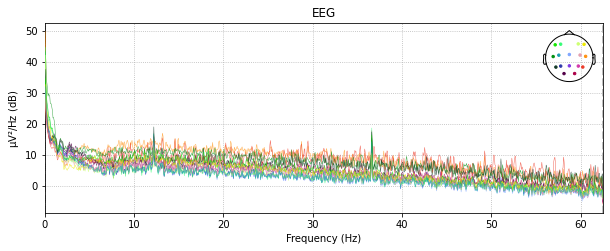

In [59]:
raw = df_to_raw(df)

In [60]:
# raw.notch_filter(50, filter_length='auto', phase='zero') #250/2 based on Nyquist Theorem

Effective window size : 16.384 (s)


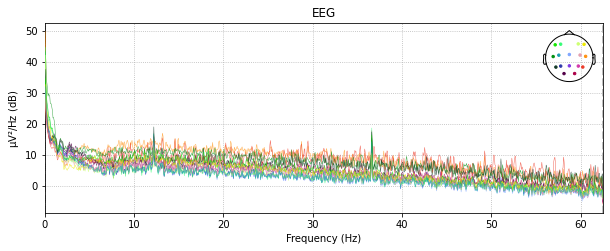

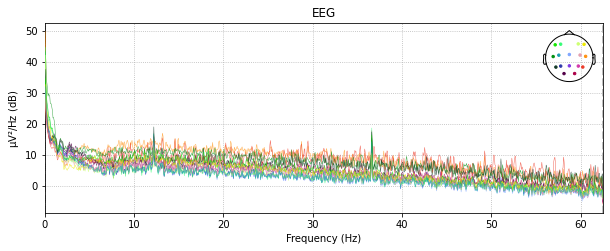

In [61]:
#observe that the 50Hz noise is now gone, yay!
raw.plot_psd()

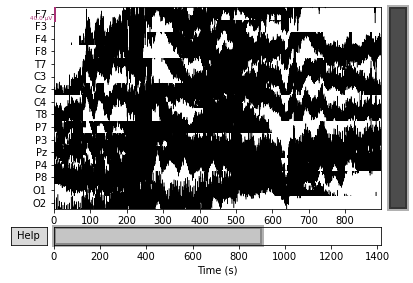

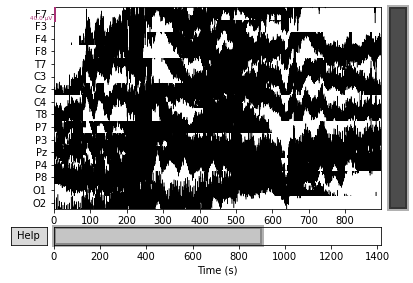

In [62]:
eeg_channels = mne.pick_types(raw.info, eeg=True)
raw.plot(duration=900, order=eeg_channels)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 4125 samples (33.000 sec)



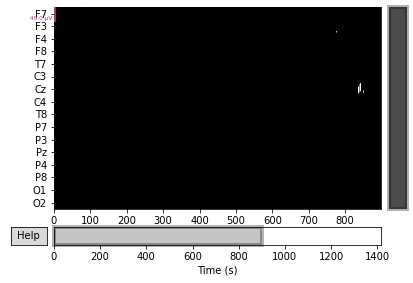

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 2063 samples (16.504 sec)



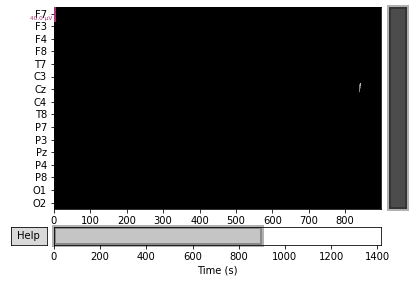

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)



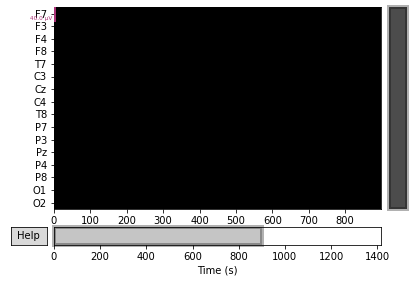

In [63]:
for cutoff in (0.1, 0.2, 1):
    raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
    fig = raw_highpass.plot(duration=900, order=eeg_channels)
    fig.subplots_adjust(top=0.9)
    fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
                 weight='bold')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 16.384 (s)


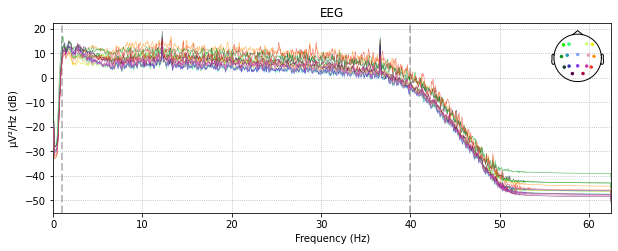

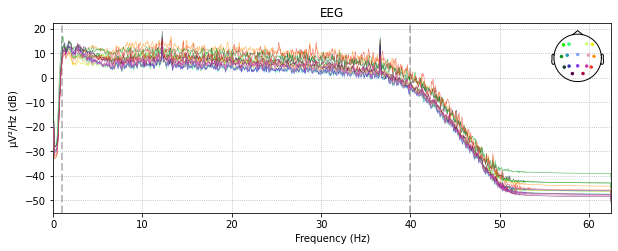

In [64]:
raw.filter(1, 40, method='iir')

raw.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 413 samples (3.304 sec)

Effective window size : 16.384 (s)


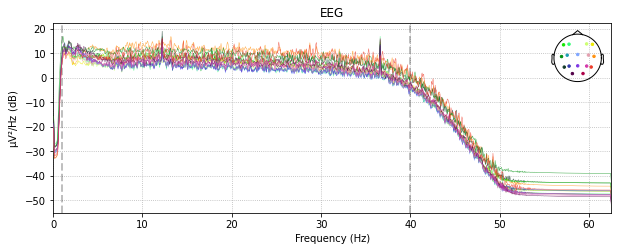

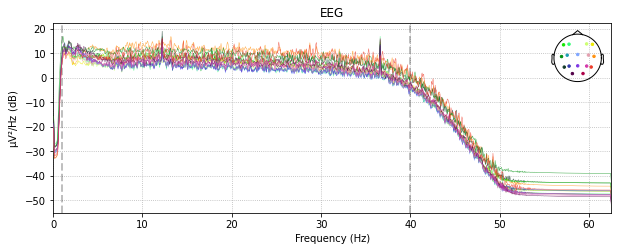

In [65]:
#filtering to remove slow drifts; also make copy of raw for later signal reconstruction
from mne.preprocessing import ICA

filt_raw = raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)
filt_raw.plot_psd()

In [66]:
# set up and fit the ICA
ica = ICA(n_components=16, random_state=32)
ica.fit(filt_raw)

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_12904/468267617.py:2: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = ICA(n_components=16, random_state=32)


Fitting ICA took 3.7s.


<ICA | raw data decomposition, fit (fastica): 177248 samples, 16 components, channels used: "eeg">

Creating RawArray with float64 data, n_channels=16, n_times=177248
    Range : 0 ... 177247 =      0.000 ...  1417.976 secs
Ready.


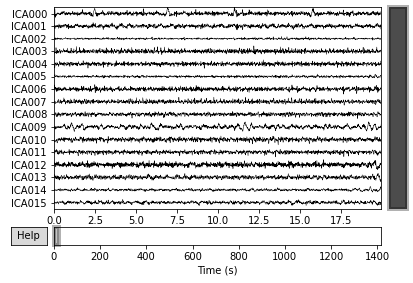

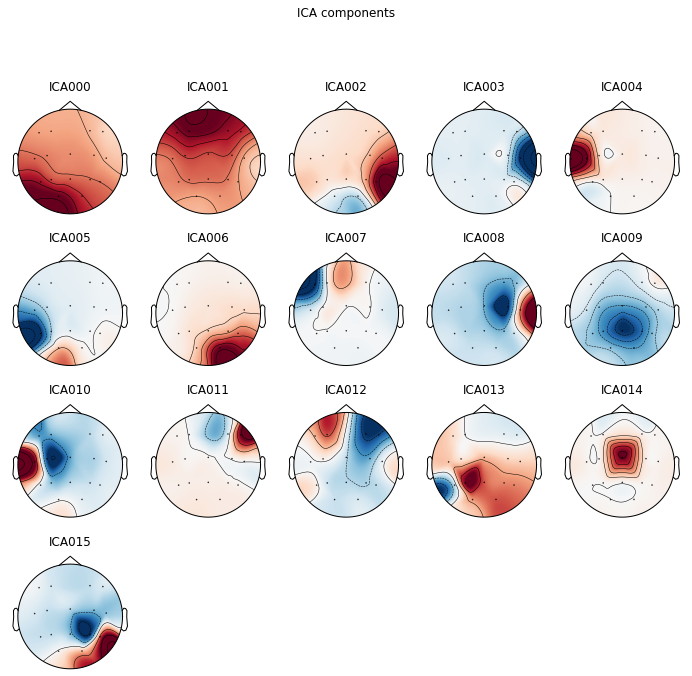

[<MNEFigure size 702x696.24 with 16 Axes>]

In [67]:
ica.plot_sources(filt_raw)
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
708 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


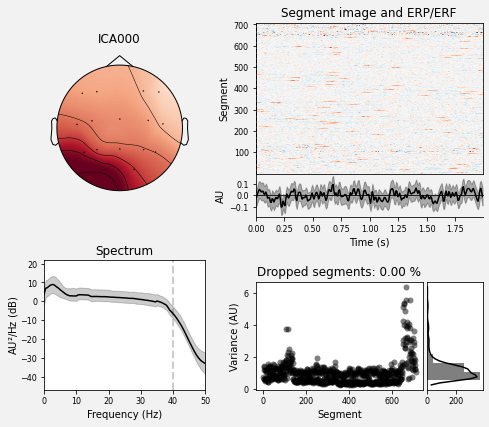

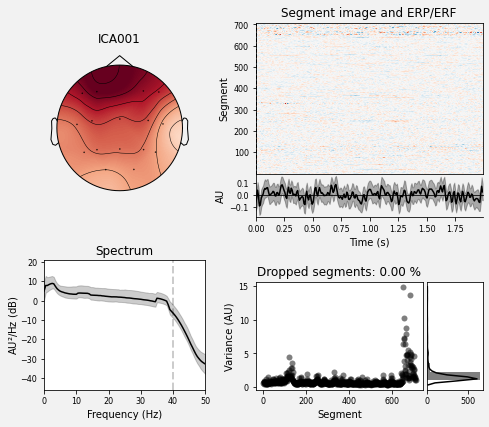

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [68]:
ica.plot_properties(filt_raw, picks=[0, 1])

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 2 ICA components
    Projecting back using 16 PCA components


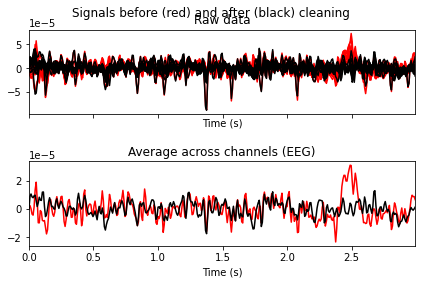

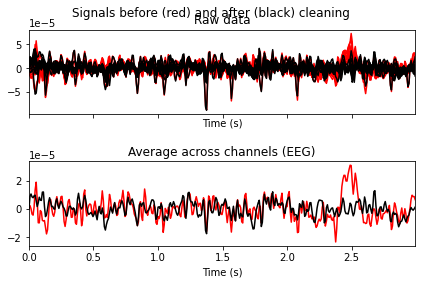

In [69]:
#test excluding 0, 1 component
ica.plot_overlay(filt_raw, exclude=[0, 1], picks='eeg')

In [73]:
# ica.exclude = [0, 1] #we want to cut down the 0, 1 component, then apply(self) to reconstruct the signal

In [74]:
# # ica.apply() changes the Raw object in-place, so let's make a copy first for comparison:
# orig_raw = raw.copy()  #we apply ica to raw
# ica.apply(raw)

In [75]:
# orig_raw.plot(order=eeg_channels, duration=20)
# raw.plot(order=eeg_channels, duration=20)